In [1]:
from tqdm import tqdm
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
PICKLES_ADDRESS = '../data/pickles/'
LAG_DATA_ADDRESS = 'lag_data/'

## import data

In [3]:
years = [str(year) for year in range(2010, 2022)]
START_YEAR, START_YEAR_IDX, SF_TAG = 2010, 0, 'SF10'
correlation_lags = list(range(-11 + START_YEAR_IDX, 11 - (START_YEAR_IDX - 1)))
print('years:', years)
print('correlation_lags:', correlation_lags)

years: ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
correlation_lags: [-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [4]:
with open(PICKLES_ADDRESS + 'dui2children.pkl', 'rb') as handle:
    dui2children = pickle.load(handle)
    print('dui2children:', len(dui2children))
with open(PICKLES_ADDRESS + 'dui2trail_final.pkl', 'rb') as handle:
    dui2parents = pickle.load(handle)
    print('dui2parents:', len(dui2parents))
with open(PICKLES_ADDRESS + 'heading2dui_final.pkl', 'rb') as handle:
    dui2name = pickle.load(handle)
    print('dui2name:', len(dui2name))
with open(PICKLES_ADDRESS + 'dui2header_final.pkl', 'rb') as handle:
    name2dui = pickle.load(handle)
    print('name2dui:', len(name2dui))
with open(PICKLES_ADDRESS + 'dui2level_final.pkl', 'rb') as handle:
    dui2level = pickle.load(handle)
    print('dui2level:', len(dui2level))
with open(PICKLES_ADDRESS + 'level2duis_final.pkl', 'rb') as handle:
    level2duis = pickle.load(handle)
    print('level2duis:', len(level2duis))
with open(PICKLES_ADDRESS + 'dui2trail.pkl', 'rb') as handle:
    dui2trail = pickle.load(handle)
    print('dui2trail:', len(dui2trail))
with open(PICKLES_ADDRESS + 'dui_intersection_final.pkl', 'rb') as handle:
    dui_intersections = pickle.load(handle)
    print('dui_intersections:', len(dui_intersections))
with open(PICKLES_ADDRESS + 'excluded_duis_final.pkl', 'rb') as handle:
    excluded_duis = pickle.load(handle)
    print('excluded_duis:', len(excluded_duis))
with open(PICKLES_ADDRESS + 'dui2pubfreq.pkl', 'rb') as handle:
    dui2pubfreq = pickle.load(handle)
    print('dui2pubfreq:', len(dui2pubfreq))
with open(PICKLES_ADDRESS + 'dui2sbfreq.pkl', 'rb') as handle:
    dui2sbfreq = pickle.load(handle)
    print('dui2sbfreq:', len(dui2sbfreq))
with open(PICKLES_ADDRESS + 'dui2pubfreqchild.pkl', 'rb') as handle:
    dui2pubfreqchild = pickle.load(handle)
    print('dui2pubfreqchild:', len(dui2pubfreqchild))
with open(PICKLES_ADDRESS + 'dui2sbfreqchild.pkl', 'rb') as handle:
    dui2sbfreqchild = pickle.load(handle)
    print('dui2sbfreqchild:', len(dui2sbfreqchild))
with open(PICKLES_ADDRESS + 'dui2pubcit.pkl', 'rb') as handle:
    dui2pubcit = pickle.load(handle)
    print('dui2pubcit:', len(dui2pubcit))
with open(PICKLES_ADDRESS + 'dui2sbcit.pkl', 'rb') as handle:
    dui2sbcit = pickle.load(handle)
    print('dui2sbcit:', len(dui2sbcit))
with open(PICKLES_ADDRESS + 'dui2pubcitchild.pkl', 'rb') as handle:
    dui2pubcitchild = pickle.load(handle)
    print('dui2pubcitchild:', len(dui2pubcitchild))
with open(PICKLES_ADDRESS + 'dui2sbcitchild.pkl', 'rb') as handle:
    dui2sbcitchild = pickle.load(handle)
    print('dui2sbcitchild:', len(dui2sbcitchild))

dui2children: 29432
dui2parents: 29307
dui2name: 29307
name2dui: 29307
dui2level: 29307
level2duis: 14
dui2trail: 29432
dui_intersections: 29307
excluded_duis: 723
dui2pubfreq: 29307
dui2sbfreq: 29307
dui2pubfreqchild: 29307
dui2sbfreqchild: 29307
dui2pubcit: 29307
dui2sbcit: 29307
dui2pubcitchild: 29307
dui2sbcitchild: 29307


In [5]:
# store all duis that have no frequency at any year of the dui2pubfreq dictionary and store them in a list called exduis
exduis = {}
for dui in dui2sbfreq:
    c = 0
    for year in years:
        c += len(dui2sbfreq[dui][year])
    if c == 0:
        exduis[dui] = True
    else:
        exduis[dui] = False

len(exduis)

29307

In [6]:
# for each dui in dui2pubfreq and dui2sbfreq, generate a time series of the number of pmids and sbids at each year and return dui2pubFreqSig and dui2sbFreqSig.
dui2pubFreqSig = {}
dui2sbFreqSig = {}
for dui in tqdm(dui2pubfreq):
    if not exduis[dui]:
        dui2pubFreqSig[dui] = []
        dui2sbFreqSig[dui] = []
        for year in years[START_YEAR_IDX:]:
            dui2pubFreqSig[dui].append(len(dui2pubfreq[dui][year]))
            dui2sbFreqSig[dui].append(len(dui2sbfreq[dui][year]))

# for each dui in dui2pubfreqchild and dui2sbfreqchild, generate a time series of the number of pmids and sbids at each year and return dui2pubFreqSigchild and dui2sbFreqSigchild.
dui2pubFreqSigchild = {}
dui2sbFreqSigchild = {}
for dui in tqdm(dui2pubfreqchild):
    if not exduis[dui]:
        dui2pubFreqSigchild[dui] = []
        dui2sbFreqSigchild[dui] = []
        for year in years[START_YEAR_IDX:]:
            dui2pubFreqSigchild[dui].append(len(dui2pubfreqchild[dui][year]))
            dui2sbFreqSigchild[dui].append(len(dui2pubfreqchild[dui][year]))

100%|██████████| 29307/29307 [00:00<00:00, 523738.47it/s]


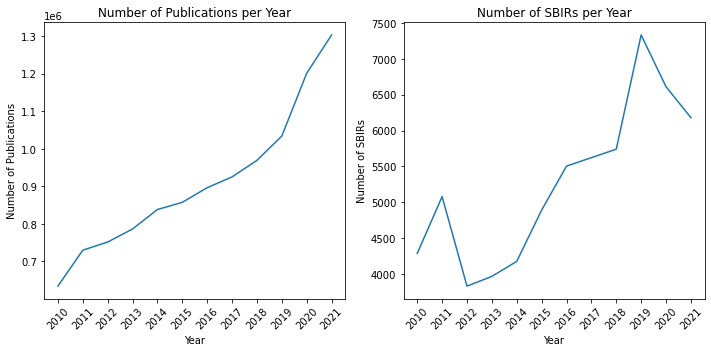

In [7]:
total_pubs_per_year = {}
for year in years:
    total_pubs_per_year[year] = []
    for dui in dui2pubfreq:
        if not exduis[dui]:
            total_pubs_per_year[year] += dui2pubfreq[dui][year]
    total_pubs_per_year[year] = len(set(total_pubs_per_year[year]))

total_sbirs_per_year = {}
for year in years:
    total_sbirs_per_year[year] = []
    for dui in dui2sbfreq:
        if not exduis[dui]:
            total_sbirs_per_year[year] += dui2sbfreq[dui][year]
    total_sbirs_per_year[year] = len(set(total_sbirs_per_year[year]))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(total_pubs_per_year.keys(), total_pubs_per_year.values())
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Publications')
axs[0].set_title('Number of Publications per Year')
axs[1].plot(total_sbirs_per_year.keys(), total_sbirs_per_year.values())
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of SBIRs')
axs[1].set_title('Number of SBIRs per Year')

for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

In [8]:
# now divide each dui2pubFreqSig and dui2sbFreqSig by the total number of publications and SBIRs per year to get the proportion of publications and SBIRs per year.
dui2pubFreqSigProp = {}
dui2sbFreqSigProp = {}
for dui in tqdm(dui2pubFreqSig):
    if not exduis[dui]:
        dui2pubFreqSigProp[dui] = []
        dui2sbFreqSigProp[dui] = []
        for i in range(len(years[START_YEAR_IDX:])):
            dui2pubFreqSigProp[dui].append(dui2pubFreqSig[dui][i] / total_pubs_per_year[years[i]])
            dui2sbFreqSigProp[dui].append(dui2sbFreqSig[dui][i] / total_sbirs_per_year[years[i]])

# now divide each dui2pubFreqSigchild and dui2sbFreqSigchild by the total number of publications and SBIRs per year to get the proportion of publications and SBIRs per year.
dui2pubFreqSigPropchild = {}
dui2sbFreqSigPropchild = {}
for dui in tqdm(dui2pubFreqSigchild):
    if not exduis[dui]:
        dui2pubFreqSigPropchild[dui] = []
        dui2sbFreqSigPropchild[dui] = []
        for i in range(len(years[START_YEAR_IDX:])):
            dui2pubFreqSigPropchild[dui].append(dui2pubFreqSigchild[dui][i] / total_pubs_per_year[years[i]])
            dui2sbFreqSigPropchild[dui].append(dui2sbFreqSigchild[dui][i] / total_sbirs_per_year[years[i]])

100%|██████████| 10873/10873 [00:00<00:00, 199456.22it/s]


In [9]:
# use minmax scaling to scale the values in dui2pubFreqSigProp and dui2sbFreqSigProp to be between 0 and 1. also account for ZeroDivisionError.
dui2pubFreqSigPropScaled = {}
dui2sbFreqSigPropScaled = {}
for dui in tqdm(dui2pubFreqSigProp):
    if not exduis[dui]:
        dui2pubFreqSigPropScaled[dui] = []
        dui2sbFreqSigPropScaled[dui] = []
        for i in range(len(years[START_YEAR_IDX:])):
            try:
                dui2pubFreqSigPropScaled[dui].append((dui2pubFreqSigProp[dui][i] - min(dui2pubFreqSigProp[dui])) / (max(dui2pubFreqSigProp[dui]) - min(dui2pubFreqSigProp[dui])))
            except ZeroDivisionError:
                dui2pubFreqSigPropScaled[dui].append(0)
            try:
                dui2sbFreqSigPropScaled[dui].append((dui2sbFreqSigProp[dui][i] - min(dui2sbFreqSigProp[dui])) / (max(dui2sbFreqSigProp[dui]) - min(dui2sbFreqSigProp[dui])))
            except ZeroDivisionError:
                dui2sbFreqSigPropScaled[dui].append(0)


dui2pubFreqSigPropScaledchild = {}
dui2sbFreqSigPropScaledchild = {}
for dui in tqdm(dui2pubFreqSigPropchild):
    if not exduis[dui]:
        dui2pubFreqSigPropScaledchild[dui] = []
        dui2sbFreqSigPropScaledchild[dui] = []
        for i in range(len(years[START_YEAR_IDX:])):
            try:
                dui2pubFreqSigPropScaledchild[dui].append((dui2pubFreqSigPropchild[dui][i] - min(dui2pubFreqSigPropchild[dui])) / (max(dui2pubFreqSigPropchild[dui]) - min(dui2pubFreqSigPropchild[dui])))
            except ZeroDivisionError:
                dui2pubFreqSigPropScaledchild[dui].append(0)
            try:
                dui2sbFreqSigPropScaledchild[dui].append((dui2sbFreqSigPropchild[dui][i] - min(dui2sbFreqSigPropchild[dui])) / (max(dui2sbFreqSigPropchild[dui]) - min(dui2sbFreqSigPropchild[dui])))
            except ZeroDivisionError:
                dui2sbFreqSigPropScaledchild[dui].append(0)

100%|██████████| 10873/10873 [00:00<00:00, 50537.98it/s]


In [10]:
#save dui2prubFreqSigPropScaledchild and dui2sbFreqSigPropScaledchild to pickle at data/pickles/
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubFreqSigPropScaled.pickle', 'wb') as handle:
    pickle.dump(dui2pubFreqSigPropScaled, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubFreqSigPropScaledchild.pickle', 'wb') as handle:
    pickle.dump(dui2pubFreqSigPropScaledchild, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbFreqSigPropScaled.pickle', 'wb') as handle:
    pickle.dump(dui2sbFreqSigPropScaled, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbFreqSigPropScaledchild.pickle', 'wb') as handle:
    pickle.dump(dui2sbFreqSigPropScaledchild, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('Saved')

Saved


In [11]:
#load the four dictionaries from pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubFreqSigPropScaled.pickle', 'rb') as handle:
    dui2pubFreqSigPropScaled = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubFreqSigPropScaledchild.pickle', 'rb') as handle:
    dui2pubFreqSigPropScaledchild = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbFreqSigPropScaled.pickle', 'rb') as handle:
    dui2sbFreqSigPropScaled = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbFreqSigPropScaledchild.pickle', 'rb') as handle:
    dui2sbFreqSigPropScaledchild = pickle.load(handle)
print('Loaded')

Loaded


## Frequency Analysis

### Cross-Correlation

In [12]:
# create a dui2cc dictionary that maps a dui to a scipy cross correlation between the scaled pub and sbir frequencies
dui2cc = {}
dui2ccchild = {}
for dui in tqdm(dui2pubFreqSigPropScaled):
    sigA, sigB = dui2pubFreqSigPropScaled[dui], dui2sbFreqSigPropScaled[dui]
    corr = signal.correlate(sigB, sigA, mode='full') / len(years)
    corr = corr.astype(np.float64)
    lags = signal.correlation_lags(len(sigB), len(sigA))
    corr /= np.max(corr) + 1e-8
    dui2cc[dui] = corr
for dui in tqdm(dui2pubFreqSigPropScaledchild):
    sigA, sigB = dui2pubFreqSigPropScaledchild[dui], dui2sbFreqSigPropScaledchild[dui]
    corr = signal.correlate(sigB, sigA, mode='full') / len(years)
    corr = corr.astype(np.float64)
    lags = signal.correlation_lags(len(sigB), len(sigA))
    corr /= np.max(corr) + 1e-8
    dui2ccchild[dui] = corr

#save the dui2cc and dui2ccchild dictionaries in data/pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2cc.pickle', 'wb') as handle:
    pickle.dump(dui2cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2ccchild.pickle', 'wb') as handle:
    pickle.dump(dui2ccchild, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 10873/10873 [00:00<00:00, 59769.50it/s]


In [13]:
#load the dui2cc and dui2ccchild dictionaries from data/pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2cc.pickle', 'rb') as handle:
    dui2cc = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2ccchild.pickle', 'rb') as handle:
    dui2ccchild = pickle.load(handle)

print('Loaded dui2cc and dui2ccchild.')

Loaded dui2cc and dui2ccchild.


In [14]:
# create dui2mcclag and dui2mcclagchild
dui2mcclag = {}
dui2mcclagchild = {}
dui2aucratio = {}
dui2aucratiochild = {}
for dui in tqdm(dui2cc):
    dui2mcclag[dui] = correlation_lags[np.argmax(dui2cc[dui])]
for dui in tqdm(dui2ccchild):
    dui2mcclagchild[dui] = correlation_lags[np.argmax(dui2ccchild[dui])]
    
for dui in tqdm(dui2cc):
    zero_index = correlation_lags.index(0)
    pos_auc = np.trapz(dui2cc[dui][zero_index + 1:], dx=1)
    neg_auc = np.trapz(dui2cc[dui][:zero_index], dx=1)
    dui2aucratio[dui] = (pos_auc + 1) / (neg_auc + 1)
for dui in tqdm(dui2ccchild):
    zero_index = correlation_lags.index(0)
    pos_auc = np.trapz(dui2ccchild[dui][zero_index:], dx=1)
    neg_auc = np.trapz(dui2ccchild[dui][:zero_index], dx=1)
    dui2aucratiochild[dui] = (pos_auc + 1) / (neg_auc + 1)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2mcclag.pickle', 'wb') as handle:
    pickle.dump(dui2mcclag, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2mcclagchild.pickle', 'wb') as handle:
    pickle.dump(dui2mcclagchild, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2aucratio.pickle', 'wb') as handle:
    pickle.dump(dui2aucratio, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2aucratiochild.pickle', 'wb') as handle:
    pickle.dump(dui2aucratiochild, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 10873/10873 [00:00<00:00, 93296.37it/s]


In [15]:
# load dui2mcclag and dui2mcclagchild from data/pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2mcclag.pickle', 'rb') as handle:
    dui2mcclag = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2mcclagchild.pickle', 'rb') as handle:
    dui2mcclagchild = pickle.load(handle)
# load dui2aucratio and dui2aucratiochild from data/pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2aucratio.pickle', 'rb') as handle:
    dui2aucratio = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2aucratiochild.pickle', 'rb') as handle:
    dui2aucratiochild = pickle.load(handle)

depth: 1
len(dui_subset_mcclags): 0
neg: 0 Ratio: 0.0
zero: 0 Ratio: 0.0
pos: 0 Ratio: 0.0
depth: 2
len(dui_subset_mcclags): 58
neg: 1 Ratio: 1.7241379310047564
zero: 16 Ratio: 27.586206896076103
pos: 41 Ratio: 70.68965517119501


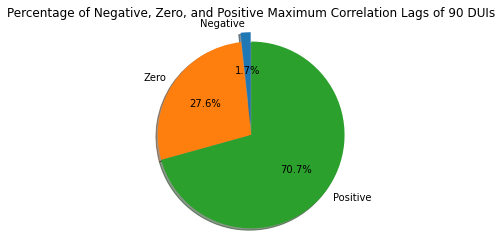

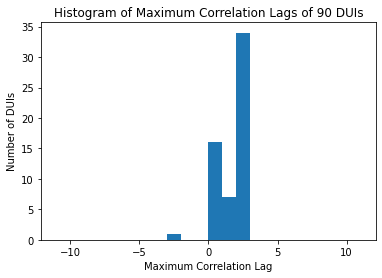

depth: 3
len(dui_subset_mcclags): 853
neg: 8 Ratio: 0.9378663540434491
zero: 602 Ratio: 70.57444314176955
pos: 243 Ratio: 28.487690504069768


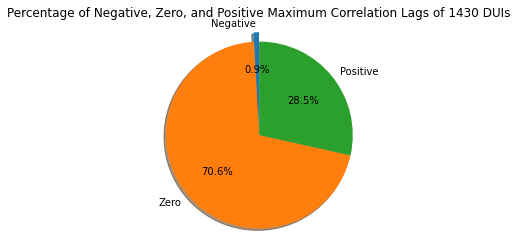

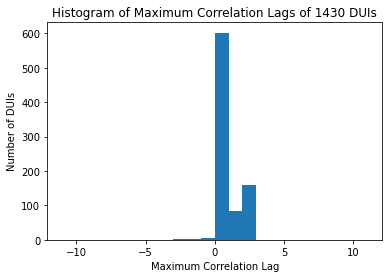

depth: 4
len(dui_subset_mcclags): 2976
neg: 22 Ratio: 0.7392473118277086
zero: 2327 Ratio: 78.19220430104899
pos: 627 Ratio: 21.068548387089695


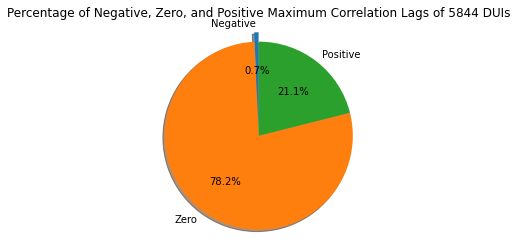

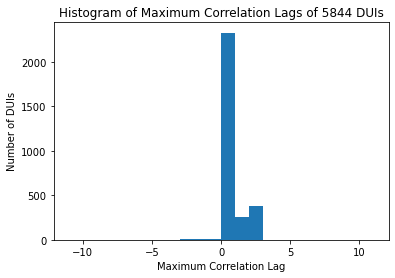

depth: 5
len(dui_subset_mcclags): 5653
neg: 38 Ratio: 0.672209446311574
zero: 4643 Ratio: 82.13338050591152
pos: 972 Ratio: 17.194410047759206


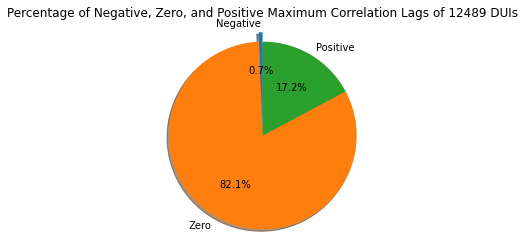

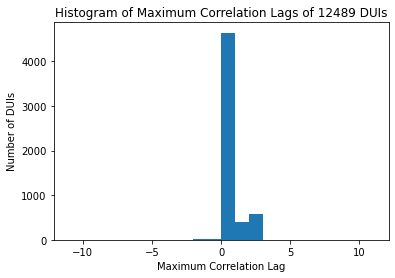

depth: 6
len(dui_subset_mcclags): 7880
neg: 55 Ratio: 0.6979695431471195
zero: 6618 Ratio: 83.98477157359339
pos: 1207 Ratio: 15.317258883246787


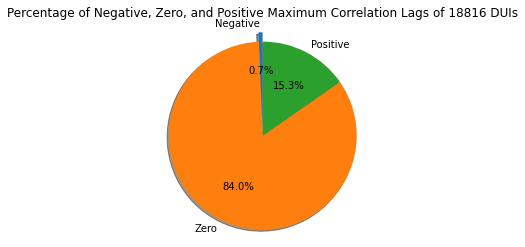

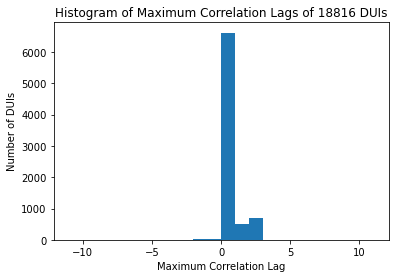

depth: 7
len(dui_subset_mcclags): 9283
neg: 62 Ratio: 0.6678875363567092
zero: 7873 Ratio: 84.81094473768341
pos: 1348 Ratio: 14.521167725949097


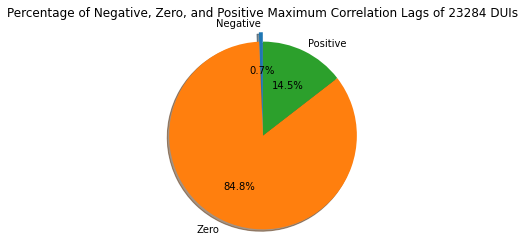

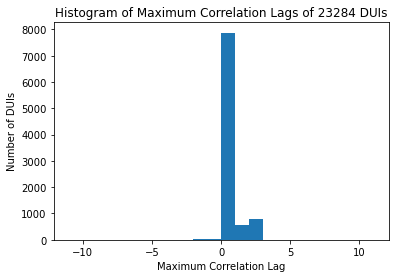

depth: 8
len(dui_subset_mcclags): 10019
neg: 67 Ratio: 0.6687294141131183
zero: 8536 Ratio: 85.19812356521757
pos: 1416 Ratio: 14.133147020659335


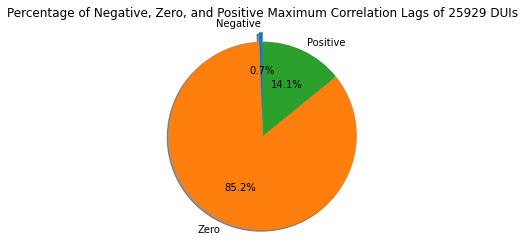

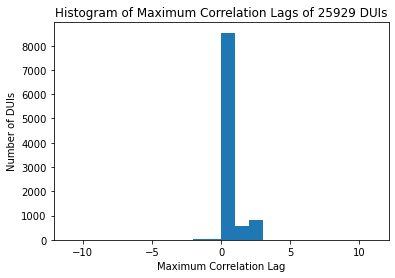

depth: 9
len(dui_subset_mcclags): 10491
neg: 68 Ratio: 0.6481746258697314
zero: 8969 Ratio: 85.49232675625913
pos: 1454 Ratio: 13.85949861786161


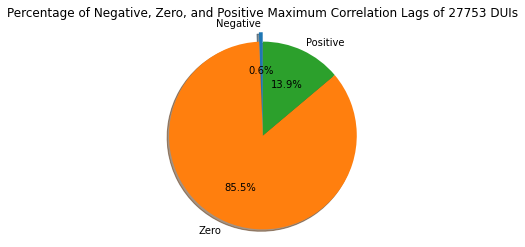

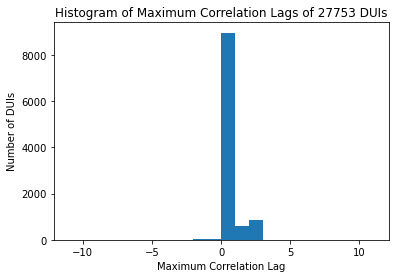

depth: 10
len(dui_subset_mcclags): 10714
neg: 70 Ratio: 0.6533507560200995
zero: 9173 Ratio: 85.61694978531962
pos: 1471 Ratio: 13.729699458650948


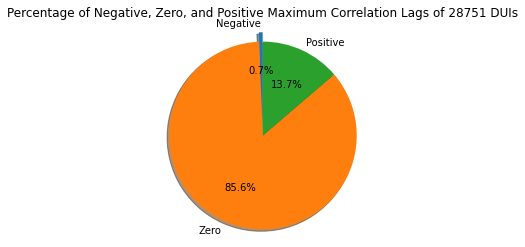

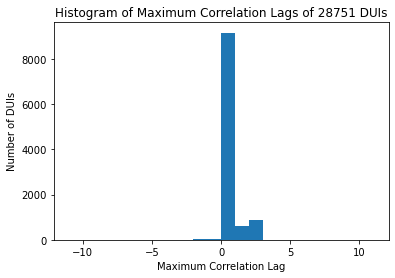

depth: 11
len(dui_subset_mcclags): 10822
neg: 70 Ratio: 0.6468305304009752
zero: 9272 Ratio: 85.67732396968346
pos: 1480 Ratio: 13.67584549990633


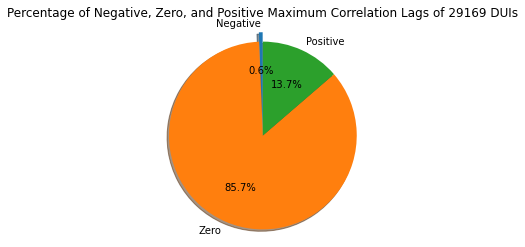

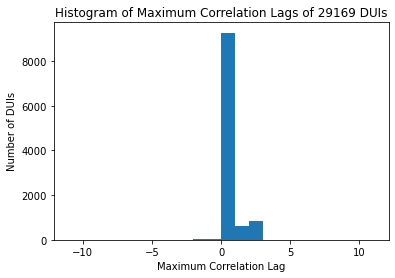

depth: 12
len(dui_subset_mcclags): 10853
neg: 70 Ratio: 0.6449829540218699
zero: 9299 Ratio: 85.68137842070527
pos: 1484 Ratio: 13.673638625263642


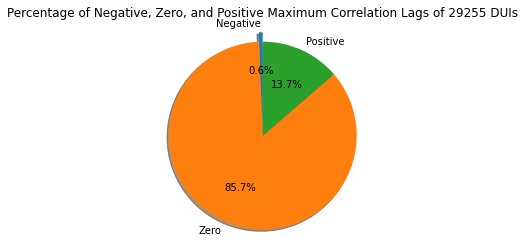

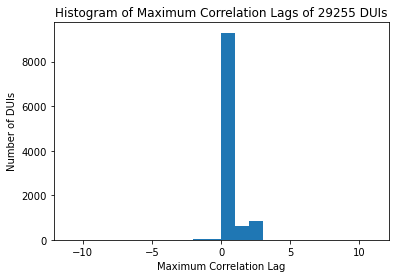

depth: 13
len(dui_subset_mcclags): 10864
neg: 70 Ratio: 0.6443298969071571
zero: 9309 Ratio: 85.68667157583894
pos: 1485 Ratio: 13.66899852724469


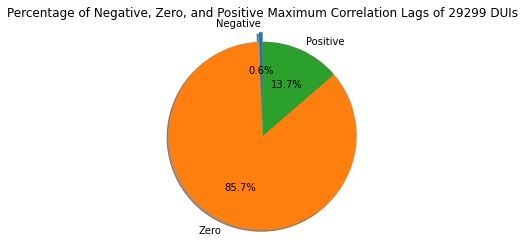

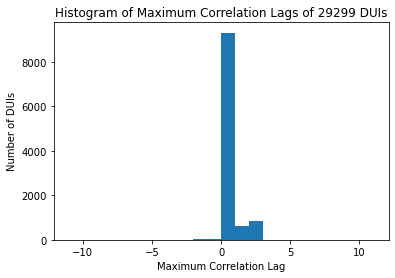

depth: 14
len(dui_subset_mcclags): 10873
neg: 70 Ratio: 0.6437965602868901
zero: 9317 Ratio: 85.68932217418507
pos: 1486 Ratio: 13.666881265518837


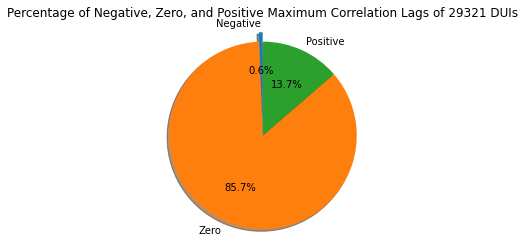

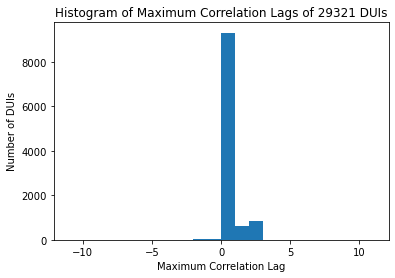

In [16]:
# iterate over max_depth and create a histogram of the maximum correlation lags of duis in dui_subset, then plot it
max_depth = 13
for depth in range(max_depth + 1):
    print('depth:', depth + 1)
    dui_subset = [dui for level in range(depth + 1) for dui in level2duis[level]]
    dui_subset_mcclags = [dui2mcclagchild[dui] for dui in dui_subset if dui in dui2mcclagchild]
    print('len(dui_subset_mcclags):', len(dui_subset_mcclags))
    neg = len([lag for lag in dui_subset_mcclags if lag < 0])
    zero = len([lag for lag in dui_subset_mcclags if lag == 0])
    pos = len([lag for lag in dui_subset_mcclags if lag > 0])
    # print the true value and percentage of negative, zero, and positive maximum correlation lags add 0.000000001 to avoid division by zero
    print('neg:', neg, 'Ratio:', neg / (len(dui_subset_mcclags) + 0.000000001) * 100)
    print('zero:', zero, 'Ratio:', zero / (len(dui_subset_mcclags) + 0.000000001) * 100)
    print('pos:', pos, 'Ratio:', pos / (len(dui_subset_mcclags) + 0.000000001) * 100)

    if neg + zero + pos == 0:
        print('=' * 50)
        continue

    # plot the three accuracy scores as a pie graph. choose the one pie graph that is empty in the middle   
    labels = 'Negative', 'Zero', 'Positive'
    sizes = [neg, zero, pos]
    explode = (0.1, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    fig1.patch.set_facecolor('white')
    plt.title('Percentage of Negative, Zero, and Positive Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.show()

    # plot the histogram of the maximum correlation lags of dui_subset_mcclags. bound the x-axis to -11 to 11 with 1 intervals
    plt.hist(dui_subset_mcclags, bins=range(-11, 12, 1))
    plt.title('Histogram of Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.xlabel('Maximum Correlation Lag')
    plt.ylabel('Number of DUIs')
    plt.show()
    
    print('=' * 50)

In [1]:
# iterate over max_depth and create a histogram of the maximum correlation lags of duis in dui_subset, then plot it
max_depth = 13
for depth in range(max_depth + 1):
    print('depth:', depth)
    dui_subset = [dui for level in range(depth + 1) for dui in level2duis[level]]
    dui_subset_mcclags = [dui2aucratiochild[dui] for dui in dui_subset if dui in dui2aucratiochild]
    print('len(dui_subset_mcclags)', len(dui_subset_mcclags))
    print(dui_subset_mcclags)
    neg = len([lag for lag in dui_subset_mcclags if lag <= 1])
    pos = len([lag for lag in dui_subset_mcclags if lag > 1])
    ppos = pos / (len(dui_subset_mcclags) + 0.000000001) * 100
    pneg = neg / (len(dui_subset_mcclags) + 0.000000001) * 100
    # print the true value and percentage of negative, zero, and positive maximum correlation lags add 0.000000001 to avoid division by zero
    print('neg:', neg, 'Ratio:', pneg)
    print('pos:', pos, 'Ratio:', ppos)

    if neg + pos == 0:
        print('=' * 50)
        continue

    # plot the three accuracy scores as a pie graph. choose the one pie graph that is empty in the middle   
    labels = 'Negative', 'Positive'
    sizes = [neg, pos]
    explode = (0.1, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    fig1.patch.set_facecolor('white')
    plt.title('Percentage of Negative, Zero, and Positive Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.show()

    # plot the histogram of the maximum correlation lags of dui_subset_mcclags. bound the x-axis to -3 to 5 with 1 intervals
    plt.hist(dui_subset_mcclags, bins=range(-3, 5, 1))
    plt.title('Histogram of Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.xlabel('Maximum Correlation Lag')
    plt.ylabel('Number of DUIs')
    plt.show()

    #save pos / (len(dui_subset_mcclags) + 0.000000001) * 100 to a txt file named like STIDX_<START_FROM_IDX>_DEPTH_<depth>.txt at data/SF11/results
    with open(LAG_DATA_ADDRESS + SF_TAG + '/results/DEPTH_' + str(depth) + '_FREQ.txt', 'w') as f:
        f.write(str(pos / (len(dui_subset_mcclags) + 0.000000001) * 100))
    
    print('=' * 50)